In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

In [5]:
#Read in data by subject dataframe from pickle file
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\subject_df.pkl"
subject_df = pd.read_pickle(path)

In [6]:
subject_df.head(2)

,Abbreviation,Subject,Description
0,ACC,Accounting,"[accounting, accounting, accounting, accountin..."
1,ADC,African American and Diaspora Studies,"[african, american, capstone, culture, diaspor..."


In [7]:
#convert the description column into a giant list of lists of words by subject
#(same thing I did before LDA)
words = subject_df["Description"].tolist()
words

[['accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'accounting',
  'activity',
  'activity',
  'activity',
  'advanced',
  'allocation',
  'also',
  'analysis',
  'analyzing',
  'application',
  'applied',
  'applied',
  'approved',
  'area',
  'area',
  'assessment',
  'asset',
  'asset',
  'asset',
  'assignment',
  'assurance',
  'assurance',
  'assurance',
  'attitude',
  'audit',
  'auditing',
  'auditing',
  'automated',
  'balance',
  'balance',
  'balance',
  'based',
  'based',
  'based',
  'begin',
  'budget',
  'budgeting',
  'budgeting',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'capital',
  'capital',
  'cash',
  'cash',
  'change',
  'collection',
  'company',
  

### I used the example notebook for the plsa library and the docs as reference: https://github.com/yedivanseven/PLSA/blob/master/notebooks/Examples.ipynb

In [8]:
#used the default pipeline, it does a lot of the things i previously did manually, plus a little more
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [9]:
#create a corpus from the list of subjects (which have lists of words)
plsa_corpus = Corpus(words, pipeline)
plsa_corpus

Corpus:
Number of documents: 69
Number of words:     3494

In [10]:
#do one example where the number of topics is 7
n_topics = 7
plsa_model = PLSA(plsa_corpus, n_topics, True)

In [11]:
plsa_result = plsa_model.fit()
plsa_model

PLSA:
====
Number of topics:     7
Number of documents:  69
Number of words:      3494
Number of iterations: 77

In [13]:
visualize = Visualize(plsa_result)

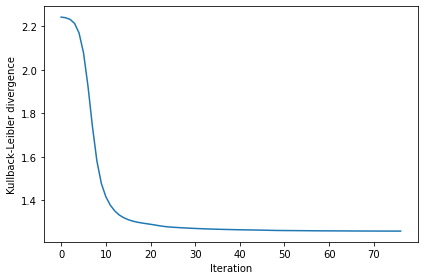

In [14]:
#following the example notebook from the plsa docs
#this shows how plsa converged over the iterations
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

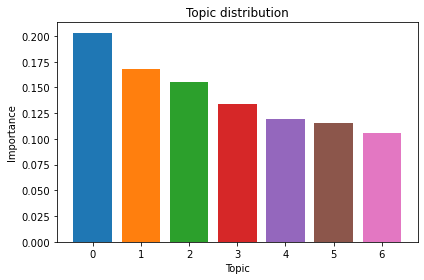

In [15]:
#this shows the "importance" of each topic that was created
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

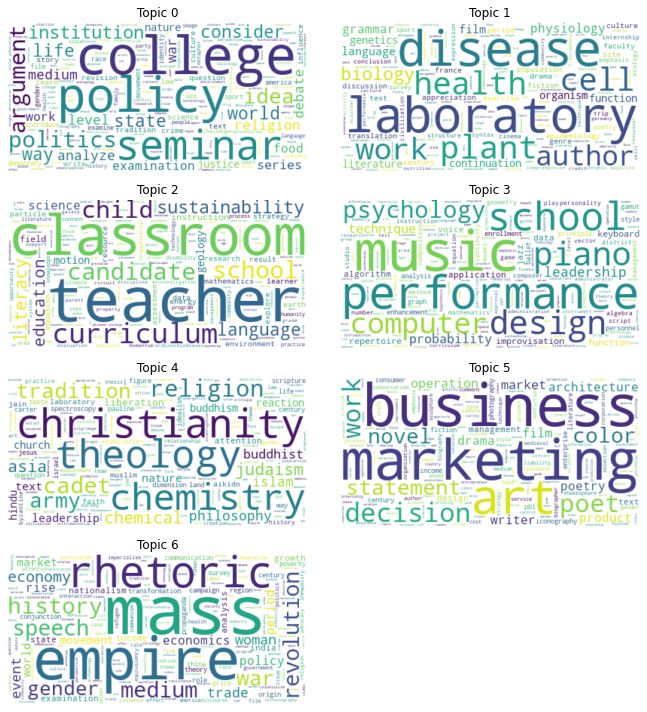

In [16]:
#this is an easy way to create wordclouds for each topic
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

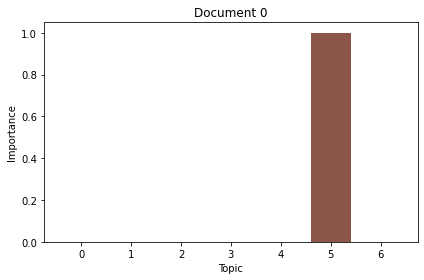

In [17]:
#this creates a graph showing the topics in a given document
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax)
fig.tight_layout()

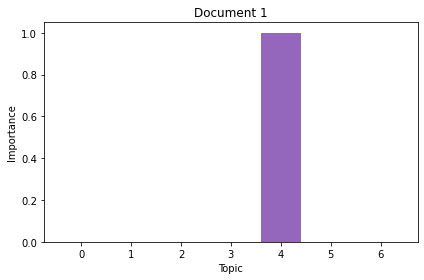

In [18]:
#here's the same thing for document 2
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(1, ax)
fig.tight_layout()

In [20]:
plsa_result.topic_given_doc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99989983e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00170339e-05],
       [0.00000000e+00, 4.50371830e-01, 5.49628170e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.93616009e-05, 2.99556870e-06, 2.26541002e-11, 0.00000000e+00,
        6.14179287e-01, 0.00000000e+00, 3.85768356e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0

In [25]:
plsa_result.topic_given_doc[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [40]:
results = pd.DataFrame(data=plsa_result.topic_given_doc)
results

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,1.0,0.000000
1,0.000000,0.000000,0.000000e+00,0.0,1.000000e+00,0.0,0.000000
2,0.999990,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000010
3,0.000000,0.450372,5.496282e-01,0.0,0.000000e+00,0.0,0.000000
4,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,1.0,0.000000
...,...,...,...,...,...,...,...
64,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
65,0.152525,0.000000,8.474746e-01,0.0,0.000000e+00,0.0,0.000000
66,0.000000,0.999993,6.760083e-06,0.0,4.567968e-12,0.0,0.000000
67,0.000000,0.000000,0.000000e+00,1.0,0.000000e+00,0.0,0.000000


In [41]:
results.columns = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6"]
results.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.00000
1,0.00000,0.000000,0.000000,0.0,1.0,0.0,0.00000
2,0.99999,0.000000,0.000000,0.0,0.0,0.0,0.00001
3,0.00000,0.450372,0.549628,0.0,0.0,0.0,0.00000
4,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.00000


In [42]:
results.insert(0, "Abbreviation", subject_df["Abbreviation"])
results.insert(1, "Subject", subject_df["Subject"])
results.head()

,Abbreviation,Subject,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,ACC,Accounting,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.00000
1,ADC,African American and Diaspora Studies,0.00000,0.000000,0.000000,0.0,1.0,0.0,0.00000
2,ANT,Anthropology,0.99999,0.000000,0.000000,0.0,0.0,0.0,0.00001
3,ARB,Arabic,0.00000,0.450372,0.549628,0.0,0.0,0.0,0.00000
4,ART,Art,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.00000


In [43]:
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\plsa_results.xlsx"
results.to_excel(path, index=False)

In [44]:
#let's do another quick example with more topics
n_topics = 10
plsa_model2 = PLSA(plsa_corpus, n_topics, True)
plsa_result2 = plsa_model2.fit()
visualize = Visualize(plsa_result2)

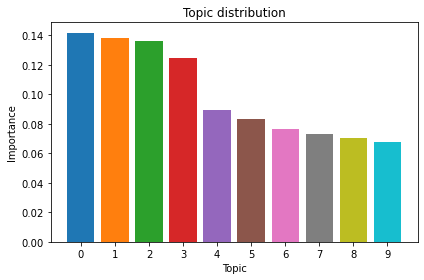

In [45]:
#show the importance of the topics
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

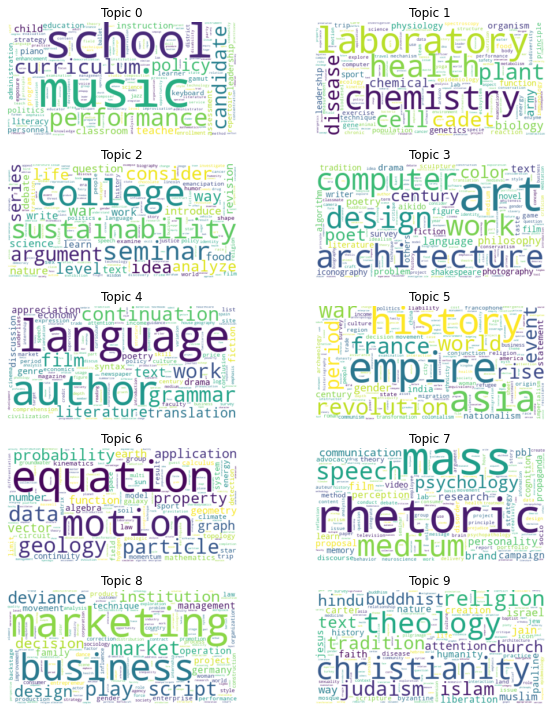

In [46]:
#show wordclouds of the topics
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

In [47]:
results2 = pd.DataFrame(data=plsa_result2.topic_given_doc)
results2.columns = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7", "Topic 8", "Topic 9"]
results2.insert(0, "Abbreviation", subject_df["Abbreviation"])
results2.insert(1, "Subject", subject_df["Subject"])
results2.head()

,Abbreviation,Subject,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,ACC,Accounting,0.0,0.0,0.0,0.0,0.000000,9.999999e-01,0.0,0.000000e+00,1.067260e-07,0.0
1,ADC,African American and Diaspora Studies,0.0,0.0,0.0,0.0,0.000000,1.694195e-09,1.0,0.000000e+00,0.000000e+00,0.0
2,ANT,Anthropology,0.0,0.0,0.0,0.0,0.000000,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
3,ARB,Arabic,0.0,0.0,0.0,0.0,0.542734,4.572663e-01,0.0,0.000000e+00,0.000000e+00,0.0
4,ART,Art,0.0,0.0,0.0,1.0,0.000000,0.000000e+00,0.0,2.401065e-11,2.893904e-08,0.0


In [48]:
path2 = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\plsa_results2.xlsx"
results2.to_excel(path2, index=False)